# Rotação 3D


Vamos usar o método dos **Eixo/Ângulo** onde temos um eixo de rotação $\hat{n}$ (vetor unitário) e um ângulo $\theta$.

Usando um vetor 3D, podemos representar a rotação como: $w = \theta \hat{n}$


Os passos para obter uma rotação são os seguintes:

1 - Projetar o nosso vetor, $\vec{v}$, no nosso eixo de rotação (sendo que este vetor projetado não é influenciado pela rotação):

$\vec{v_{||}} = \hat{n} (\hat{n} \cdot \vec{v}^T) = (\hat{n} \cdot \hat{n}^T) \cdot \vec{v}$

2 - Agora obtemos o vetor residual entre $\vec{v}$ e o $\vec{v_{||}}$, sendo este vetor perpendicular a $\vec{v_{||}}$:

$\vec{v_{\perp}} = \vec{v} - \vec{v_{||}} = (I - \hat{n} \cdot \hat{n}^T) \cdot \vec{v}$

3 - Criamos a matriz que representa o operador $\hat{n}$ num produto vetorial e também criamos a matriz ao quadrado de operador:

$[\hat{n}]_{\times} = \begin{bmatrix} 0 & -\hat{n}_z & \hat{n}_y \\ \hat{n}_z & 0 & -\hat{n}_x \\ -\hat{n}_y & \hat{n}_x & 0 \end{bmatrix}$
$[\hat{n}]_{\times}^2 = \begin{bmatrix} -\hat{n}_z \hat{n}_z + \hat{n}_y(-\hat{n}_y) & \hat{n}_x \hat{n}_y & -\hat{n}_x(-\hat{n}_z) \\ \hat{n}_x(-\hat{n}_y) & -\hat{n}_z \hat{n}_z + \hat{n}_x(-\hat{n}_x) &  \hat{n}_z \hat{n}_y \\ \hat{n}_x \hat{n}_z & -\hat{n}_z (-\hat{n}_y) & -\hat{n}_y \hat{n}_y + \hat{n}_x(-\hat{n}_x) \end{bmatrix}$

4 - Calculamos a rotação de 90 e 180 graus:

$\vec{v}_{\times} = \hat{n} \times \vec{v} = [\hat{n}]_{\times} \cdot \vec{v}$ -> 90 graus

$\vec{v}_{\times\times} = \hat{n} \times \vec{v}_{\times} = [\hat{n}]_{\times}^2 \cdot \vec{v} = -\vec{v}_{\perp}$ -> 180 graus

5 - Calculamos o vetor rotacionado, mas ainda assente no plano:

$\vec{u}_{\perp} = \cos{\theta} \vec{v}_{\perp} + \sin{\theta} \vec{v}_{\times} = (\sin{\theta}[\hat{n}]_{\times} - \cos{\theta}[\hat{n}]_{\times}^2) \cdot \vec{v}$


6 - Sabemos também que:

$\vec{v_{||}} = \vec{v} - \vec{v}_{\perp} = \vec{v} + \vec{v}_{\times\times} = (I + [\hat{n}]_{\times}^2) \cdot \vec{v}$


7 - Obtemos o vetor final rotacionado:


$\vec{u} = \vec{u}_{\perp} + \vec{v}_{||} = ( I + \sin{\theta} [\hat{n}]_{\times} + (1 - \cos{\theta}) [\hat{n}]_{\times}^2 ) \cdot \vec{v}$

**ATENÇÃO**:

$[\hat{n}]_{\times}^2 = [\hat{n}]_{\times} \cdot [\hat{n}]_{\times}$

In [13]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=6)

In [14]:
def plot(*args):
    """ Plota múltiplos vetores no espaço 3D """
    ax = plt.axes(projection='3d')
    ax.set_xlim([-2, 3])
    ax.set_ylim([-2, 3])
    ax.set_zlim([-2, 3])

    for c, vec in args:
        vec = vec.flatten()
        ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color=c)


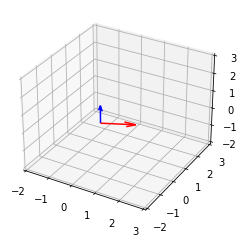

In [15]:
# Nosso v
v = np.array([
    [1.5],
    [0], 
    [0.5]
])

# Eixo de rotação
axis_vec = np.array([
    [0],
    [0], 
    [1]
])

# Ângulo em radianos
theta = np.deg2rad(90)

# Plotar vetores
plot(("r", v), ("b", axis_vec))

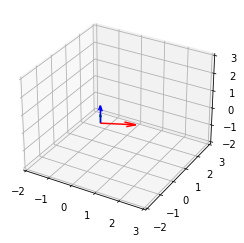

In [16]:
# v projetado em axis_vec
v_proj = axis_vec * (axis_vec.flatten() @ v.flatten())

np.testing.assert_array_almost_equal( v_proj, (axis_vec @ axis_vec.T) @ v) 

plot(("r", v), ("b", axis_vec), ("g", v_proj))

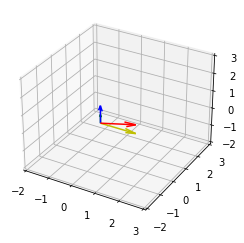

In [17]:
# Resiudal entre v e v_proj

v_perp = v - v_proj

np.testing.assert_array_almost_equal( v_perp, (np.identity(3) - (axis_vec  @ axis_vec.T)) @ v) 

plot(("r", v), ("b", axis_vec), ("g", v_proj), ("y", v_perp))

In [18]:
# Operador axis_vec no produto vetorial, representado matricialmente
axis_vec_cross = np.array([
    [0, -axis_vec[2,0], axis_vec[1,0]],
    [axis_vec[2,0], 0, -axis_vec[0,0]],
    [-axis_vec[1,0], axis_vec[0,0], 0]
])

axis_vec_cross_2 = np.array([
    [-axis_vec[2,0] * axis_vec[2,0] + axis_vec[1,0]*(-axis_vec[1,0]), axis_vec[0,0] * axis_vec[1,0], -axis_vec[0,0] * (-axis_vec[2,0])],
    [-axis_vec[0,0] * (-axis_vec[1,0]), -axis_vec[2,0]*axis_vec[2,0] + axis_vec[0,0] * (-axis_vec[0,0]), axis_vec[2,0] * axis_vec[1,0]],
    [axis_vec[0,0] * axis_vec[2,0], -axis_vec[2,0] * (-axis_vec[1,0]), -axis_vec[1,0] * axis_vec[1,0] + axis_vec[0,0] * (-axis_vec[0,0])]
])

print(axis_vec_cross)
print(axis_vec_cross_2)

[[ 0 -1  0]
 [ 1  0  0]
 [ 0  0  0]]
[[-1  0  0]
 [ 0 -1  0]
 [ 0  0  0]]


In [19]:
# Rotacionar v 90 graus em relação ao axis_vec
v_x = axis_vec_cross @ v
v_x

array([[0. ],
       [1.5],
       [0. ]])

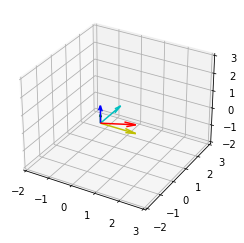

In [20]:
# Calcular vetor rotacionado no plano
u_perp = np.cos(theta) * v_perp + np.sin(theta) * v_x

np.testing.assert_array_almost_equal( u_perp, ( np.sin(theta) * axis_vec_cross - np.cos(theta) * axis_vec_cross_2 ) @ v) 

plot(("r", v), ("b", axis_vec), ("g", v_proj), ("y", v_perp), ("c", u_perp))

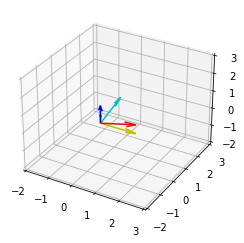

In [21]:
# Calcular vetor rotacionado final
u = u_perp + v_proj

R = ( np.identity(3) + np.sin(theta) * axis_vec_cross + (1 - np.cos(theta)) * axis_vec_cross_2 )

np.testing.assert_array_almost_equal( u, R @ v) 

plot(("r", v), ("b", axis_vec), ("g", v_proj), ("y", v_perp), ("c", u))

Com isto deduzimos uma fórmula de calcular a rotação 3D, podendo armazenar numa matriz de rotação, $R$.

Esta fórmula chama-se ***Fórmula de Rodriguez*** e permite-nos criar a seguinte matriz de transformação: 

$R(\hat{n}, \theta) = I + \sin{\theta} \cdot [\hat{n}]_{\times} + (1 - \cos{\theta}) \cdot [\hat{n}]_{\times}^2$

Podemos assim transformar o vetor, $\vec{v}$, tendo o ângulo, $\theta$, e o vetor unitário de rotação, $\hat{n}$:

$\vec{u} = R \cdot \vec{v}$

Essa fórmula pode ser simplificada caso a rotação seja infinésima ou instantânea e $\theta$ esteja em radianos:


$R(\hat{n}, \theta) \approx I + \sin{\theta} \cdot [\hat{n}]_{\times} \approx I + [\theta \hat{n}_{\times}] = [\hat{n}]_{\times} = \begin{bmatrix} 1 & -w_z & w_y \\ w_z & 1 & -w_z \\ -w_y & w_x & 1 \end{bmatrix}$

Em que $w$ é o vetor: $w = \theta \hat{n}$

In [22]:
# Rodriguez's Formula simplified

w = theta * axis_vec

R_w = np.array([
    [1, -w[2, 0], w[1, 0]],
    [w[2, 0], 1, -w[1, 0]],
    [-w[1, 0], w[0, 0], 1]
])

print("Vetor rotacionado: ", u.flatten())
print("Vetor rotacionado com a fórmula de Rodrigues: ", (R @ v).flatten())
print("Vetor rotacionado com a fórmula simplificada de Rodrigues: ", (R_w @ v). flatten())

Vetor rotacionado:  [9.184851e-17 1.500000e+00 5.000000e-01]
Vetor rotacionado com a fórmula de Rodrigues:  [1.665335e-16 1.500000e+00 5.000000e-01]
Vetor rotacionado com a fórmula simplificada de Rodrigues:  [1.5      2.356194 0.5     ]


Esta fórmula deriva de algo chamado ***Exponential Twist***:

$R(\hat{n}, \theta) = \lim_{k \to \infty} (I + \frac{1}{k}[\theta \hat{n}]_{\times})^k$

Que pode ser extendida para um série de Taylor, resultando na ***Fórmula de Rodrigues***

No fim, este método com a representação em **Eixo/ângulo** e consequentemente, com a fórmula de Rodrigues, permite-nos obter uma matriz de rotação, PORÉM não permite-nos obter uma matriz única para cada rotação!

Isto, porque rotacionar 90 graus é o mesmo que rotacionar 90 + 360 graus OU rotacionar 45 graus no eixo $\hat{n}$ é o mesmo que rotacionar -45 graus no eixo $-\hat{n}$.